## Weather Dataset

In [4]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the dataset
df = pd.read_csv('/home/christine/Desktop/My Projects/Weather/weather/weatherHistory.csv')

In [6]:
#View the data
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Data Cleaning

In [8]:
#check for missing values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [10]:
#drop missing values
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [12]:
#check for duplicates
df.duplicated().sum()

24

In [13]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [14]:
df.shape

(95936, 12)

In [15]:
df.duplicated().sum()

24

In [16]:
df[df.duplicated()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
36072,2010-08-02 00:00:00.000 +0200,Clear,rain,18.800000,18.800000,0.93,6.2790,270.0,14.9086,0.0,1016.99,Partly cloudy starting in the afternoon contin...
36073,2010-08-02 01:00:00.000 +0200,Clear,rain,18.222222,18.222222,0.97,6.2790,291.0,14.9086,0.0,1017.09,Partly cloudy starting in the afternoon contin...
36074,2010-08-02 02:00:00.000 +0200,Clear,rain,18.072222,18.072222,0.98,11.2700,290.0,6.8425,0.0,1013.23,Partly cloudy starting in the afternoon contin...
36075,2010-08-02 03:00:00.000 +0200,Clear,rain,16.622222,16.622222,0.99,6.4400,300.0,11.9784,0.0,1016.78,Partly cloudy starting in the afternoon contin...
36076,2010-08-02 04:00:00.000 +0200,Clear,rain,16.094444,16.094444,0.99,3.0751,280.0,11.9784,0.0,1016.67,Partly cloudy starting in the afternoon contin...
36077,2010-08-02 05:00:00.000 +0200,Clear,rain,15.955556,15.955556,0.99,3.8801,276.0,9.9820,0.0,1016.69,Partly cloudy starting in the afternoon contin...
36078,2010-08-02 06:00:00.000 +0200,Clear,rain,17.088889,17.088889,1.00,6.4400,310.0,9.9820,0.0,1017.08,Partly cloudy starting in the afternoon contin...
36079,2010-08-02 07:00:00.000 +0200,Clear,rain,20.822222,20.822222,0.87,3.2200,300.0,9.9820,0.0,1017.27,Partly cloudy starting in the afternoon contin...
36080,2010-08-02 08:00:00.000 +0200,Clear,rain,23.405556,23.405556,0.74,1.8837,334.0,9.9820,0.0,1017.27,Partly cloudy starting in the afternoon contin...
36081,2010-08-02 09:00:00.000 +0200,Clear,rain,26.050000,26.050000,0.59,1.5939,5.0,9.9820,0.0,1017.15,Partly cloudy starting in the afternoon contin...


## Exploratory Data Analysis

In [17]:
def cat_plot(df,feature):
    fig,ax=plt.subplots(1,2,figsize=(20,8))
    sns.boxplot(x=feature,y='Temperature (C)',data=df,ax=ax[0])
    plt.xticks(rotation=90)
    ax[0].set_title('Boxplot')
    sns.countplot(df[feature],ax=ax[1])
    plt.xticks(rotation=90)
    plt.show()

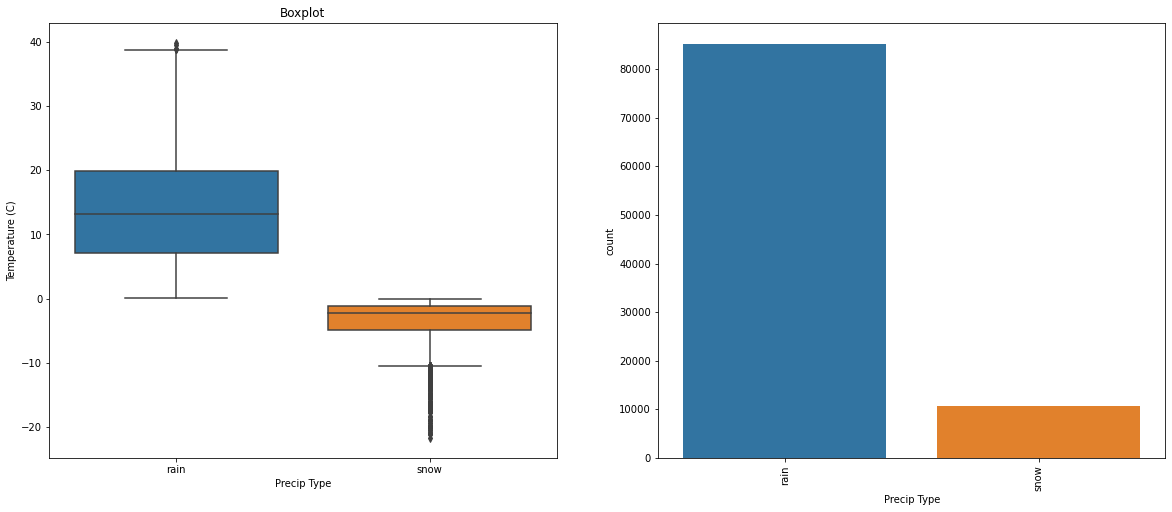

In [18]:
cat_plot(df,'Precip Type')

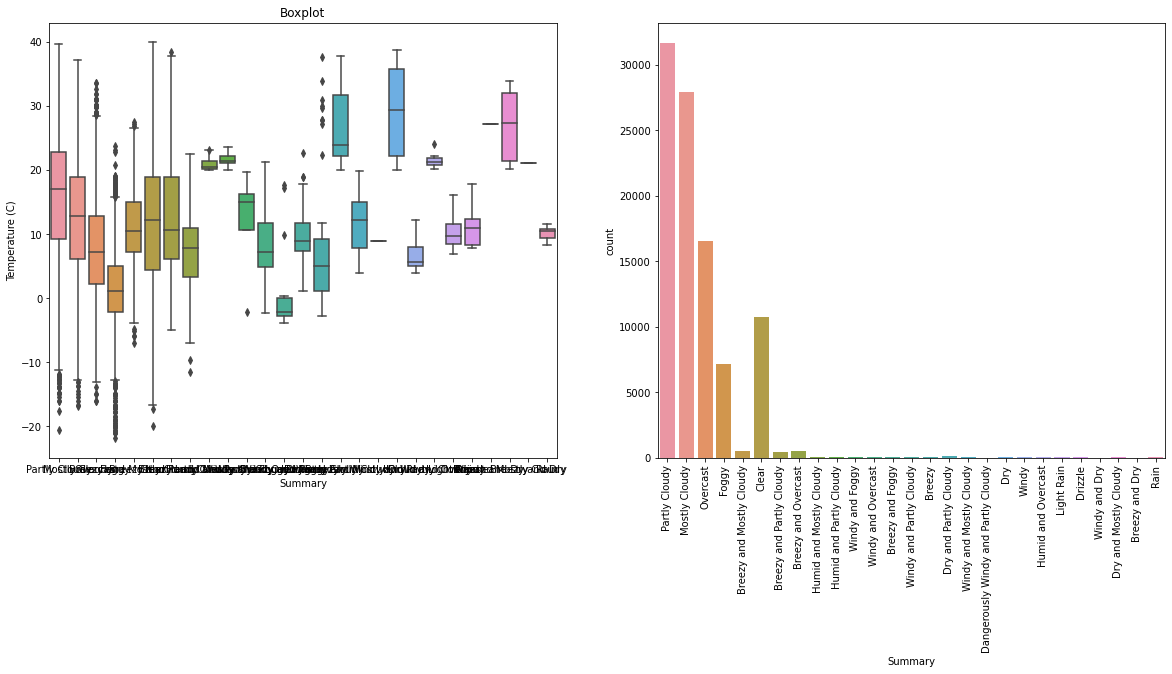

In [19]:
cat_plot(df,'Summary')

In [20]:
def num_plot(df,feature):
    fig,ax=plt.subplots(1,2,figsize=(20,8))
    sns.distplot(df[feature],ax=ax[0])
    sns.boxplot(df[feature],ax=ax[1])
    plt.show()

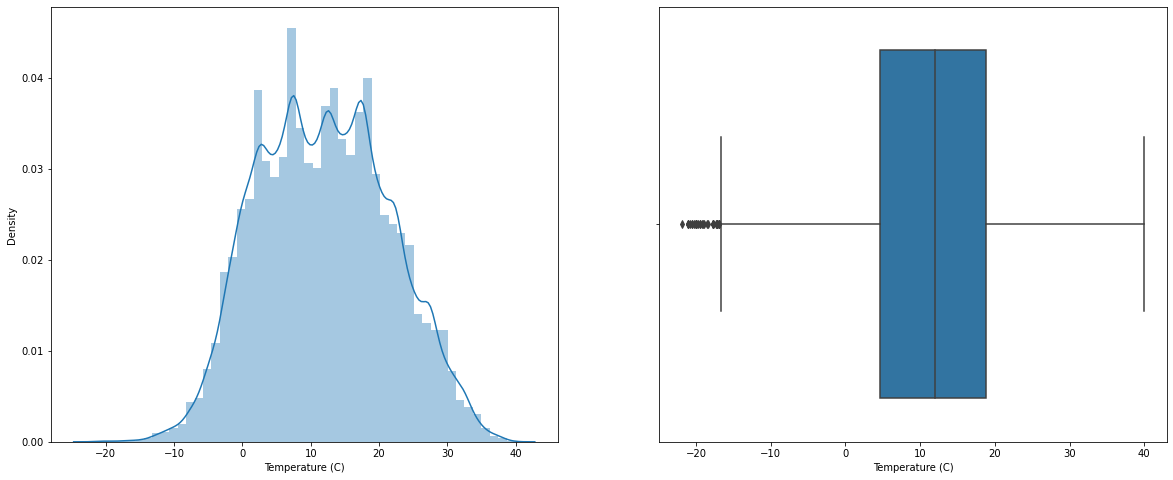

In [21]:
num_plot(df,'Temperature (C)')

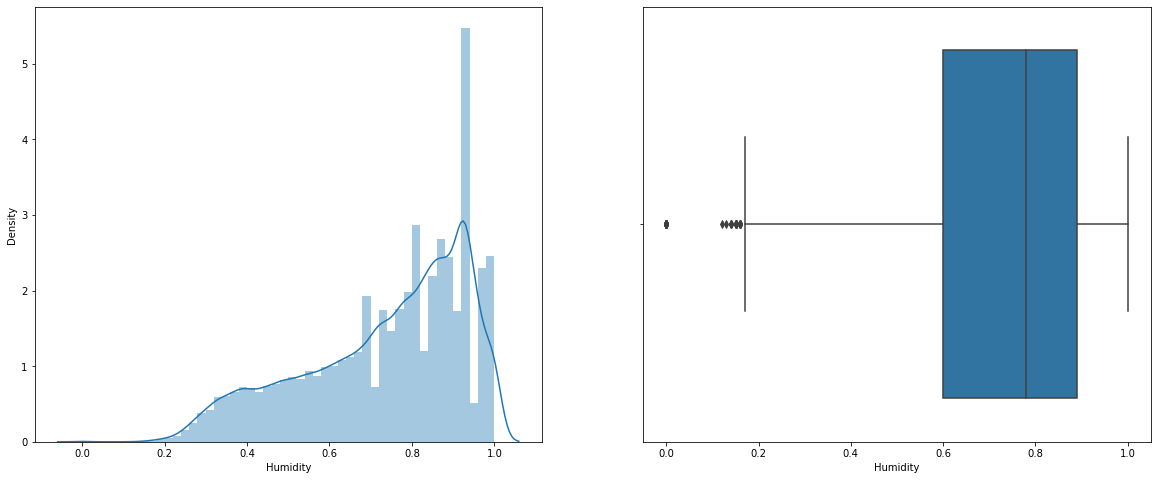

In [22]:
num_plot(df,'Humidity')

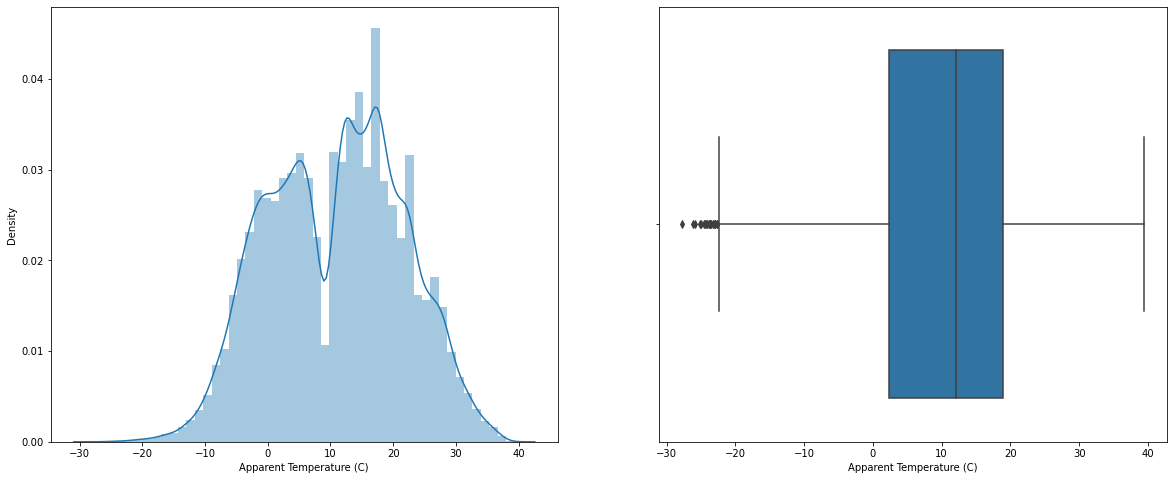

In [23]:
num_plot(df,'Apparent Temperature (C)')

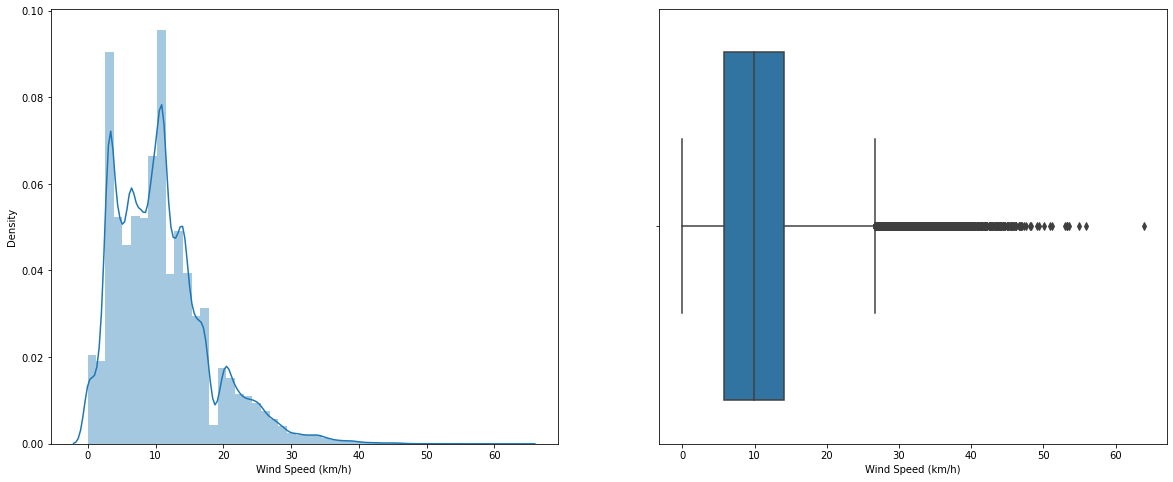

In [24]:
num_plot(df,'Wind Speed (km/h)')

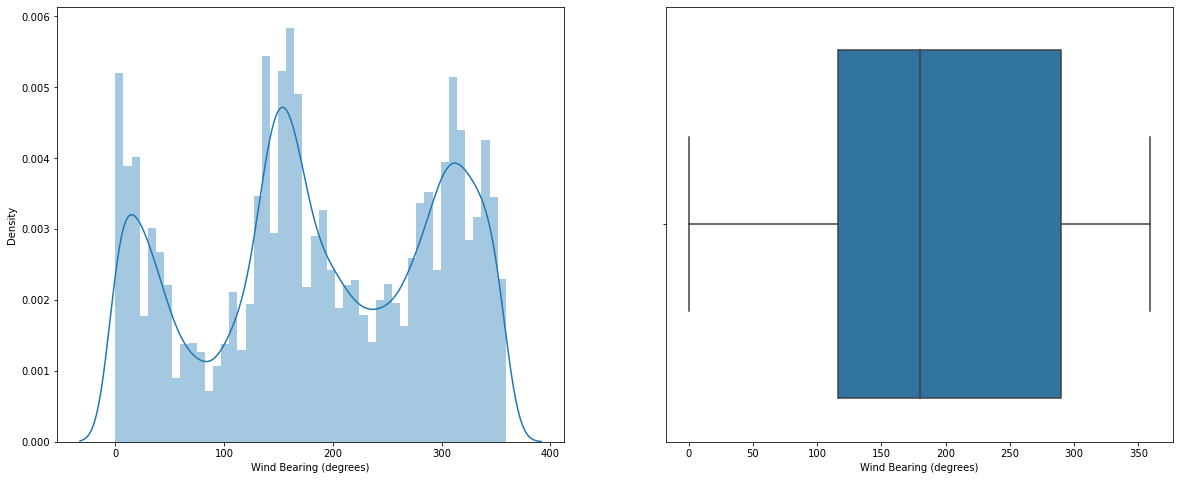

In [25]:
num_plot(df,'Wind Bearing (degrees)')

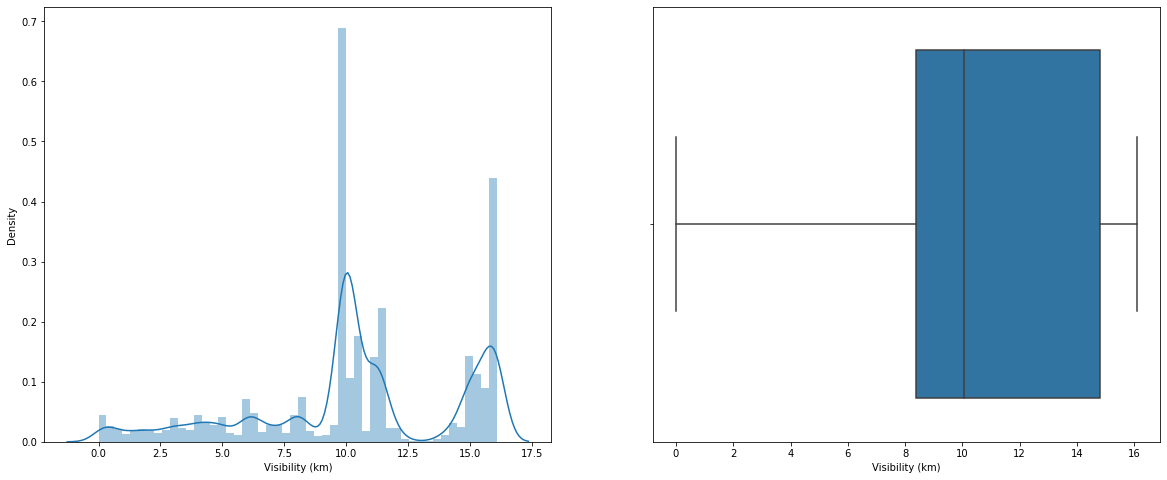

In [26]:
num_plot(df,'Visibility (km)')

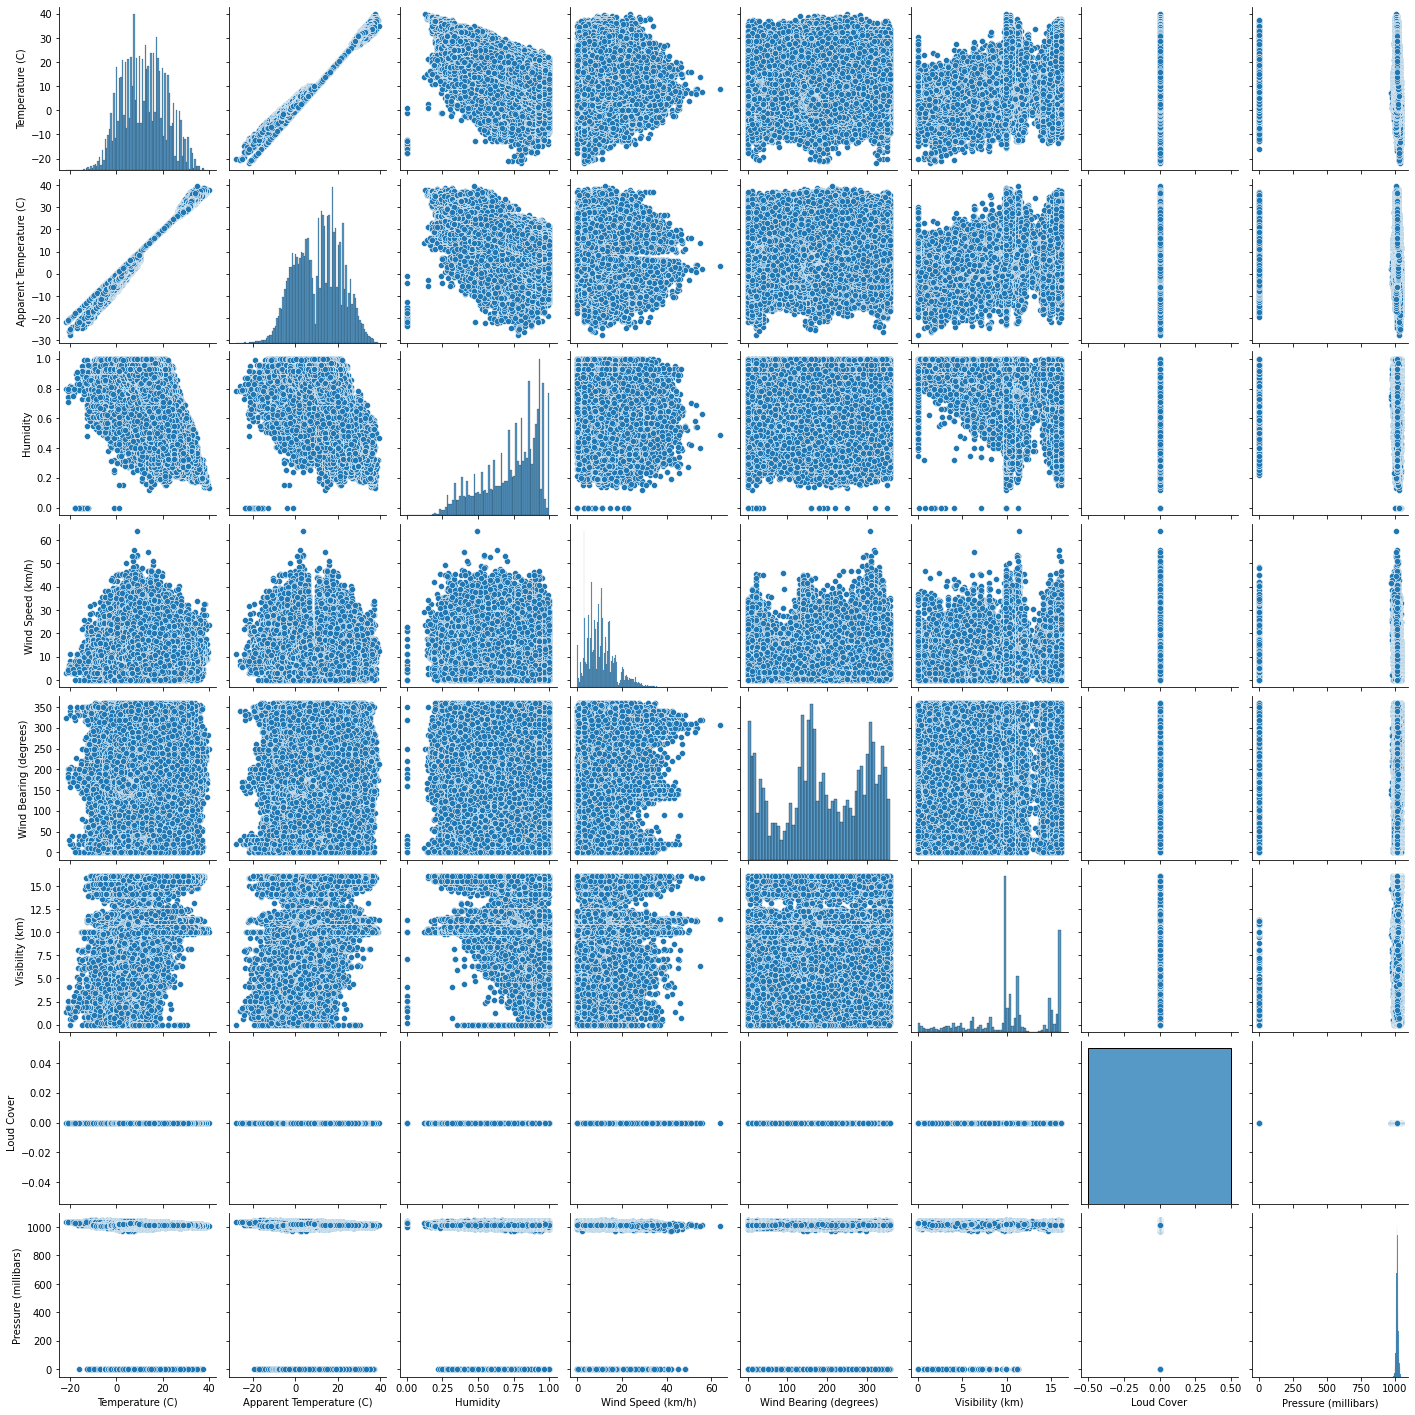

In [27]:
sns.pairplot(df)

In [28]:
#correlation
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,NaN,-0.005253
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,NaN,-0.000037
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,NaN,0.005375
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,NaN,-0.049453
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,NaN,-0.011629
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,NaN,0.061011
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,NaN,1.000000


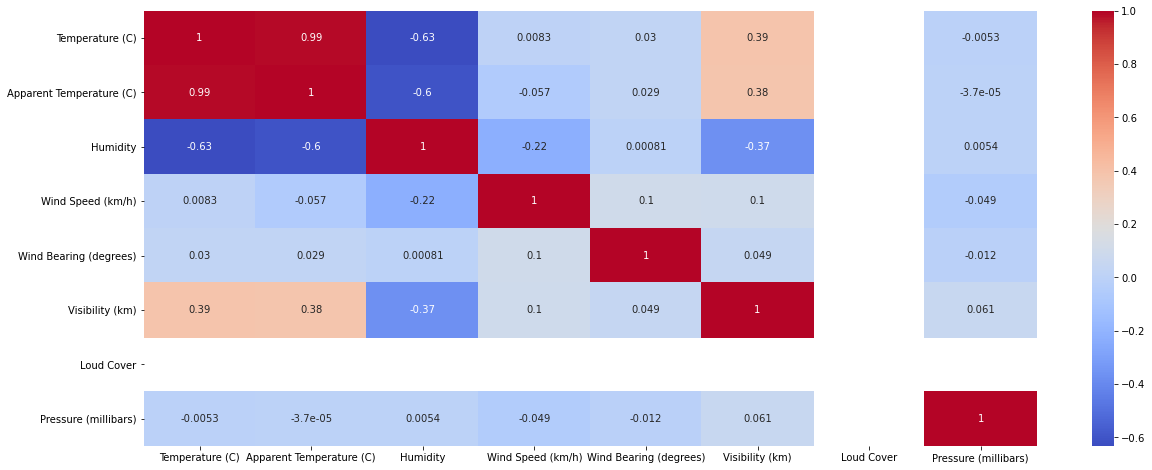

In [29]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [30]:
df_cat = df[['Summary','Precip Type']]
df_cat.head()

,Summary,Precip Type
0,Partly Cloudy,rain
1,Partly Cloudy,rain
2,Mostly Cloudy,rain
3,Partly Cloudy,rain
4,Mostly Cloudy,rain


In [31]:
# Dummy variables
df_cat = pd.get_dummies(df_cat,drop_first=True)

df_cat.head()

,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# NUmerical variables Base Model
df_base =df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]

## Train Test Split

In [33]:
#Identify x and y variable
X = df.loc[:, df_base.columns]
y = df['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 Score:', r2_score(y_test, lr_pred))

MAE: 5.675129071112311
MSE: 50.43285163621772
RMSE: 7.101609087820711
R2 Score: 0.4469012922689336


In [34]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Temperature (C)   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                          5.608e+04
Date:                Tue, 02 May 2023   Prob (F-statistic):                        0.00
Time:                        07:17:32   Log-Likelihood:                     -3.3228e+05
No. Observations:               95936   AIC:                                  6.646e+05
Df Residuals:                   95931   BIC:                                  6.646e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Humidity                 -20.6625      0.122   -169.319      0.000     -20.902     -20.423
Wind Speed (km/h)         -0.0912      0.004    -25.291      0.000      -0.098      -0.084
Wind Bearing (degrees)     0.0070      0.000     30.079      0.000       0.007       0.007
Visibility (km)            0.6903      0.006    113.159      0.000       0.678       0.702
Pressure (millibars)       0.0193      0.000    150.657      0.000       0.019       0.020
==============================================================================
Omnibus:                      854.955   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1329.176
Skew:                          -0.069   Prob(JB):                    2.36e-289
Kurtosis:                       3.560   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking for assumptions

## Linearity

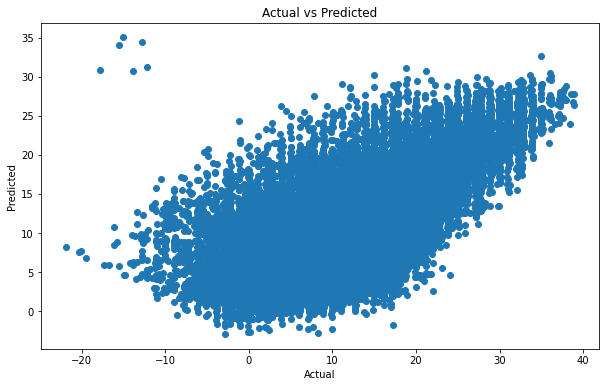

In [35]:
# Predicted vs Actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

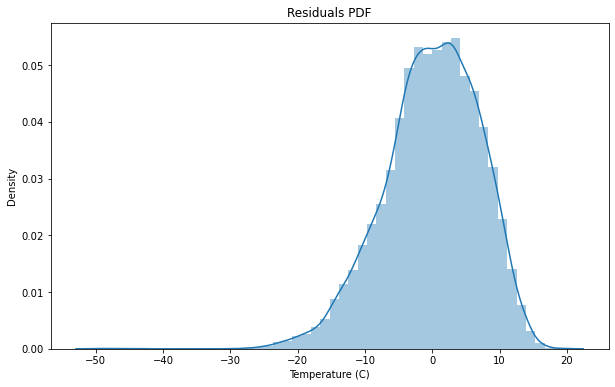

In [36]:
#Normality test
#Normality of residuals
residuals = y_test - lr_pred

plt.figure(figsize=(10,6))
sns.distplot(residuals)
plt.title('Residuals PDF')
plt.show()

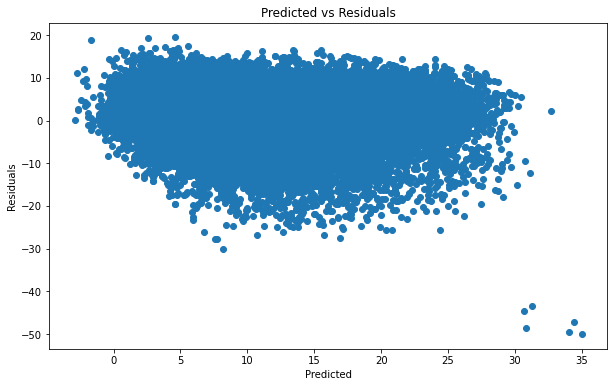

In [37]:
#Homoscedacity
plt.figure(figsize=(10,6))
plt.scatter(lr_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()

In [38]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
4,Pressure (millibars),26.76
0,Humidity,13.82
3,Visibility (km),7.43
2,Wind Bearing (degrees),4.04
1,Wind Speed (km/h),3.43
